In [54]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

In [55]:
# Mendapatkan dataset MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

# Mengambil data dan target dari dataset MNIST
X, y = mnist.data, mnist.target


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Label 0: 6903 data points
Label 1: 7877 data points
Label 2: 6990 data points
Label 3: 7141 data points
Label 4: 6824 data points
Label 5: 6313 data points
Label 6: 6876 data points
Label 7: 7293 data points
Label 8: 6825 data points
Label 9: 6958 data points


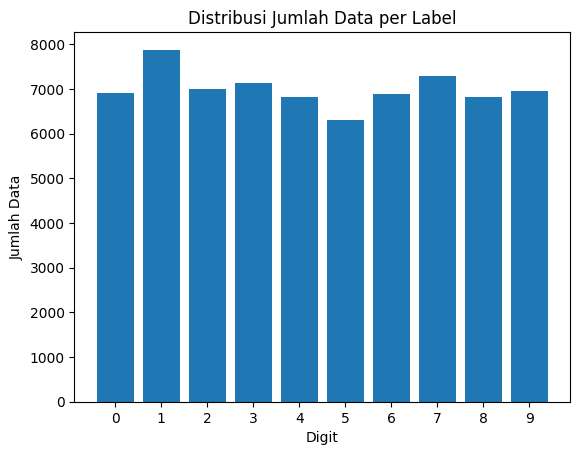

In [56]:
# 1. Cek Data Imbalance
label_counts = np.bincount(y.astype(int))
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} data points")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10))
plt.xlabel('Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.show()

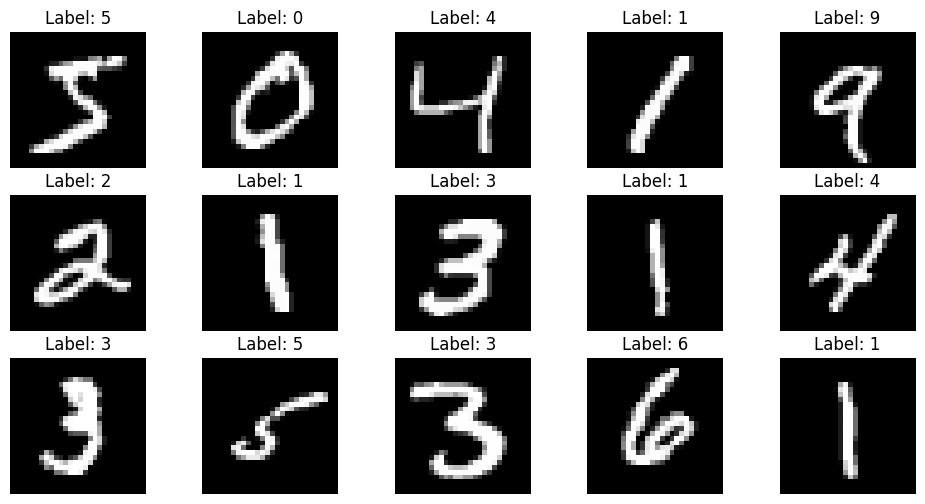

In [4]:
# 2. Menampilkan 15 Citra Pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

In [5]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# 3. Ekstraksi Fitur PCA
pca = PCA(n_components=50)  # Ganti jumlah komponen sesuai kebutuhan
X_pca = pca.fit_transform(X_scaled)

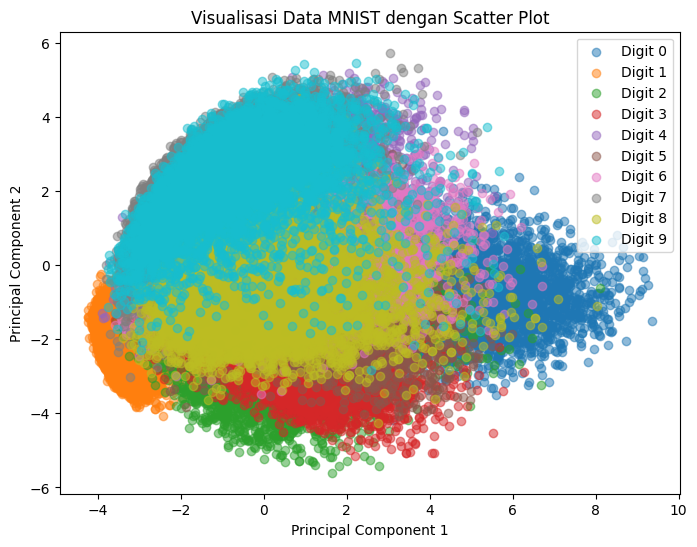

In [59]:
# Scatter plot untuk visualisasi
plt.figure(figsize=(8, 6))
for digit in range(10):
    digit_indices = np.where(mnist.target.astype(int) == digit)[0]
    plt.scatter(X_pca[digit_indices, 0], X_pca[digit_indices, 1], label=f'Digit {digit}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Data MNIST dengan Scatter Plot')
plt.legend()
plt.show()

# **70:30**

In [8]:
# 4. Pembagian Data Training dan Testing 70:30
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [9]:
# 5. Klasifikasi dengan Naive Bayes Gaussian
nb_classifier = GaussianNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [10]:
# 5. Klasifikasi dengan SVM
# Inisialisasi model SVM dengan kernel linear dan parameter C serta gamma yang diatur
svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
# Melatih model pada data training
svm_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

In [11]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [12]:
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")
print("")
print("")
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")

Naive Bayes (Testing) Accuracy: 0.8708095238095238 = 87.08%
Naive Bayes (Testing) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2058
           1       0.95      0.95      0.95      2364
           2       0.83      0.86      0.84      2133
           3       0.84      0.83      0.83      2176
           4       0.85      0.85      0.85      1936
           5       0.76      0.83      0.79      1915
           6       0.92      0.92      0.92      2088
           7       0.92      0.87      0.89      2248
           8       0.84      0.83      0.83      1992
           9       0.83      0.84      0.84      2090

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000

Naive Bayes (Testing) Confusion Matrix:
[[1909    0   15   13    5   71   34    4    5    2]
 [   1 2234   38   14    2   31    4   11  

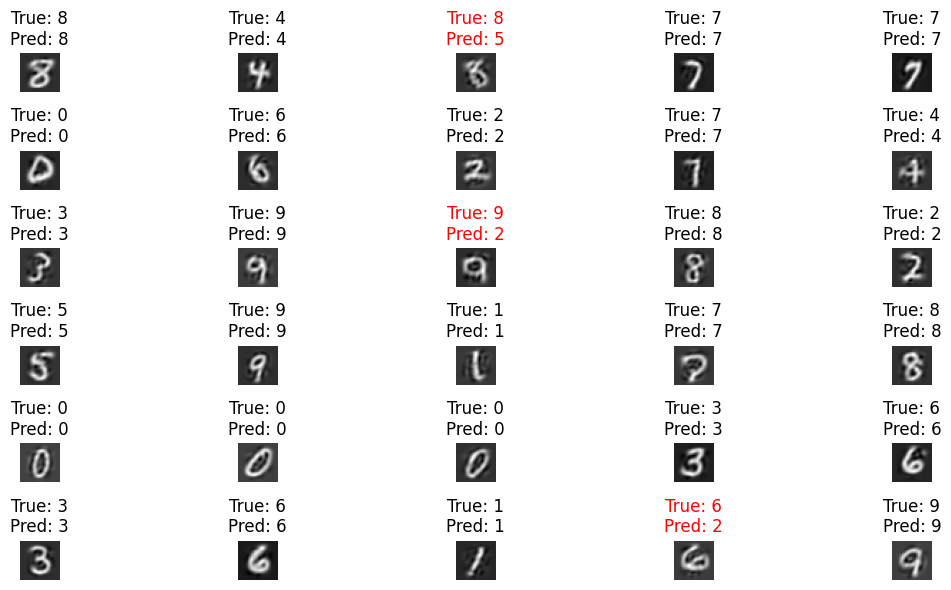

In [13]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [14]:
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")
print("")
print("")
evaluate_model(y_train, svm_train_preds, "SVM (Training)")

SVM (Testing) Accuracy: 0.9324761904761905 = 93.25%
SVM (Testing) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2058
           1       0.96      0.98      0.97      2364
           2       0.91      0.93      0.92      2133
           3       0.90      0.92      0.91      2176
           4       0.92      0.95      0.93      1936
           5       0.90      0.90      0.90      1915
           6       0.96      0.96      0.96      2088
           7       0.94      0.94      0.94      2248
           8       0.94      0.88      0.90      1992
           9       0.93      0.89      0.91      2090

    accuracy                           0.93     21000
   macro avg       0.93      0.93      0.93     21000
weighted avg       0.93      0.93      0.93     21000

SVM (Testing) Confusion Matrix:
[[2001    1    7    3    3   18   13    3    7    2]
 [   0 2325    6   16    1    4    0    5    6    1]
 [  16   12 19

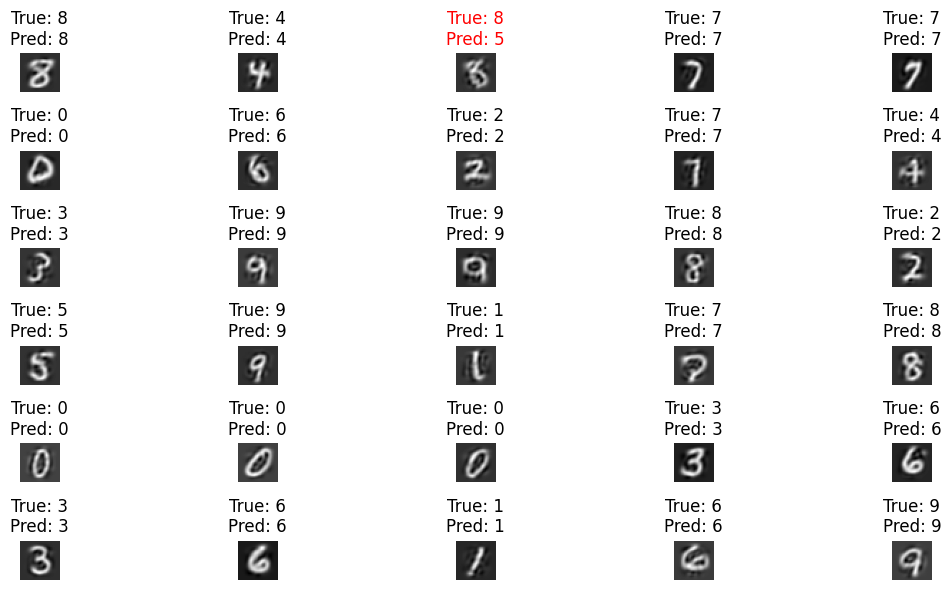

In [15]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# **80:20**


In [16]:
# 4. Pembagian Data Training dan Testing 80:20
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [17]:
# 5. Klasifikasi dengan Naive Bayes Gaussian
nb_classifier = GaussianNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [18]:
# 5. Klasifikasi dengan SVM
# Inisialisasi model SVM dengan kernel linear dan parameter C serta gamma yang diatur
svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
# Melatih model pada data training
svm_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

In [19]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [20]:
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")
print("")
print("")
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")

Naive Bayes (Testing) Accuracy: 0.8729285714285714 = 87.29%
Naive Bayes (Testing) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1343
           1       0.96      0.94      0.95      1600
           2       0.83      0.85      0.84      1380
           3       0.84      0.83      0.83      1433
           4       0.85      0.85      0.85      1295
           5       0.76      0.84      0.80      1273
           6       0.93      0.91      0.92      1396
           7       0.91      0.87      0.89      1503
           8       0.84      0.84      0.84      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000

Naive Bayes (Testing) Confusion Matrix:
[[1252    0    9    6    4   39   23    4    5    1]
 [   0 1510   22   12    1   22    4    8  

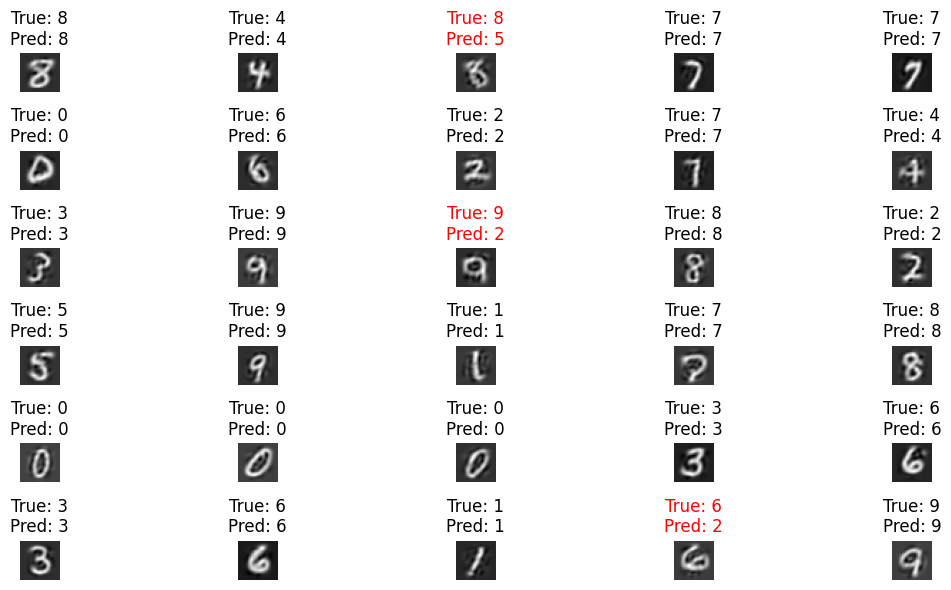

In [21]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [24]:
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")
print("")
print("")
evaluate_model(y_train, svm_train_preds, "SVM (Training)")

SVM (Testing) Accuracy: 0.9318571428571428 = 93.19%
SVM (Testing) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1343
           1       0.96      0.98      0.97      1600
           2       0.92      0.93      0.92      1380
           3       0.89      0.91      0.90      1433
           4       0.92      0.94      0.93      1295
           5       0.90      0.90      0.90      1273
           6       0.96      0.96      0.96      1396
           7       0.94      0.94      0.94      1503
           8       0.94      0.87      0.90      1357
           9       0.92      0.89      0.91      1420

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000

SVM (Testing) Confusion Matrix:
[[1312    1    4    2    2    7    8    1    3    3]
 [   0 1569    5   10    1    1    0    4    8    2]
 [   8    7 12

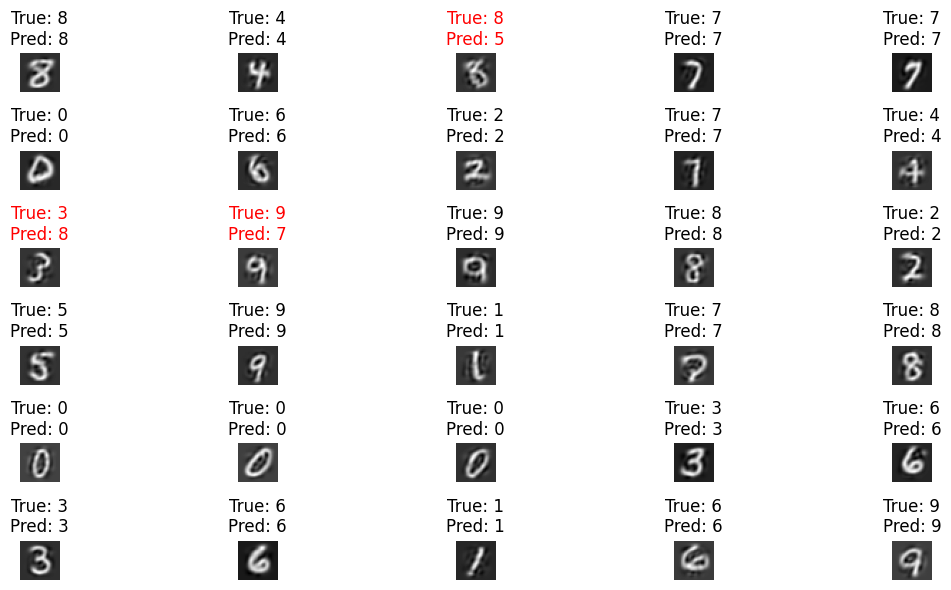

In [25]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# **90:10**

In [26]:
# 4. Pembagian Data Training dan Testing 80:20
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

In [27]:
# 5. Klasifikasi dengan Naive Bayes Gaussian
nb_classifier = GaussianNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [28]:
# 5. Klasifikasi dengan SVM
# Inisialisasi model SVM dengan kernel linear dan parameter C serta gamma yang diatur
svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
# Melatih model pada data training
svm_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

In [29]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [30]:
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")
print("")
print("")
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")

Naive Bayes (Testing) Accuracy: 0.8692857142857143 = 86.93%
Naive Bayes (Testing) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       683
           1       0.95      0.95      0.95       800
           2       0.82      0.86      0.84       674
           3       0.83      0.82      0.83       760
           4       0.83      0.83      0.83       611
           5       0.76      0.84      0.80       658
           6       0.92      0.91      0.92       677
           7       0.93      0.86      0.89       724
           8       0.85      0.83      0.84       693
           9       0.84      0.84      0.84       720

    accuracy                           0.87      7000
   macro avg       0.87      0.87      0.87      7000
weighted avg       0.87      0.87      0.87      7000

Naive Bayes (Testing) Confusion Matrix:
[[636   0   5   4   1  22  12   1   2   0]
 [  0 760  12   5   0  11   1   2   8   1]
 [  5   7 

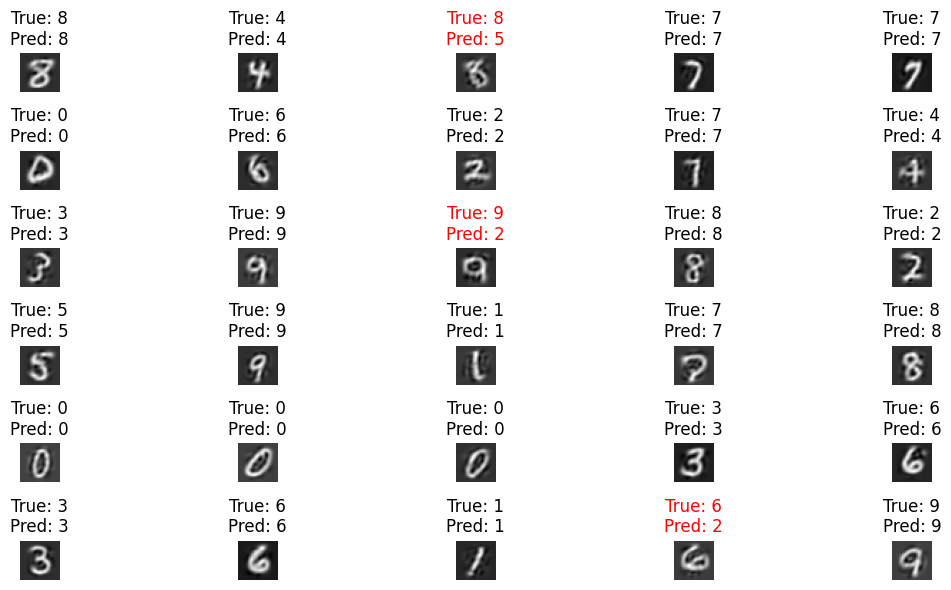

In [31]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [32]:
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")
print("")
print("")
evaluate_model(y_train, svm_train_preds, "SVM (Training)")

SVM (Testing) Accuracy: 0.9281428571428572 = 92.81%
SVM (Testing) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       683
           1       0.96      0.98      0.97       800
           2       0.89      0.92      0.91       674
           3       0.89      0.91      0.90       760
           4       0.92      0.94      0.93       611
           5       0.90      0.89      0.90       658
           6       0.96      0.96      0.96       677
           7       0.94      0.94      0.94       724
           8       0.93      0.87      0.90       693
           9       0.93      0.89      0.91       720

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000

SVM (Testing) Confusion Matrix:
[[671   0   3   1   0   2   3   0   1   2]
 [  0 786   4   5   0   0   0   3   1   1]
 [  4   2 621   5   9   4   9   7 

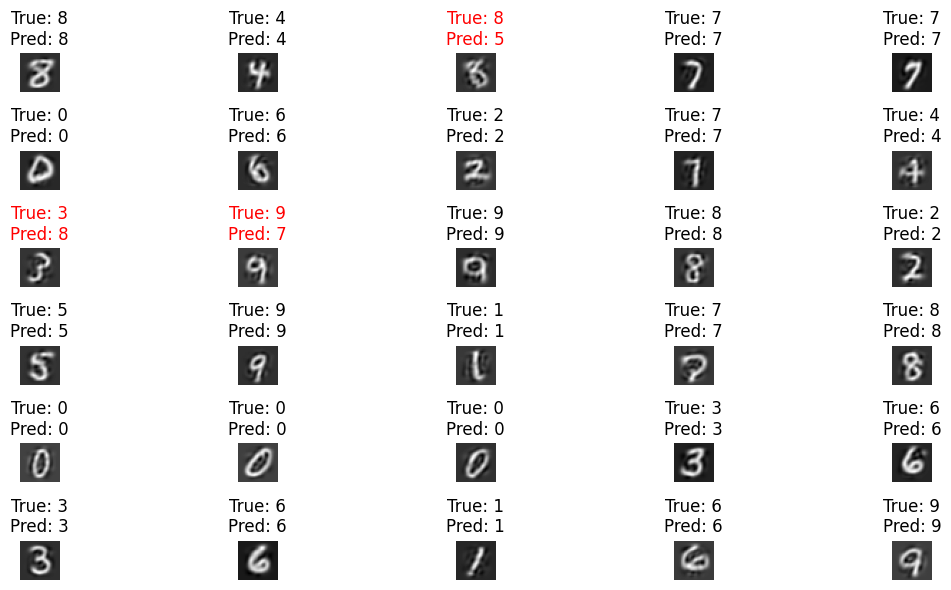

In [33]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# **Multinominal NB dengan Flatten**

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
X_flatten = mnist.data.reshape((mnist.data.shape[0], -1))

## **70:30**

In [36]:
# 4. Pembagian Data Training dan Testing 70:30
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.3, random_state=42)

In [37]:
# 5. Klasifikasi dengan Naive Bayes Multinomial
nb_classifier = MultinomialNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [38]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [39]:
evaluate_model(y_test, nb_test_preds, "Naive Bayes Multi (Testing)")
print("")
print("")
evaluate_model(y_train, nb_train_preds, "Naive Bayes Multi (Training)")

Naive Bayes Multi (Testing) Accuracy: 0.8257142857142857 = 82.57%
Naive Bayes Multi (Testing) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2058
           1       0.88      0.94      0.91      2364
           2       0.88      0.83      0.85      2133
           3       0.79      0.81      0.80      2176
           4       0.83      0.74      0.78      1936
           5       0.85      0.66      0.75      1915
           6       0.87      0.92      0.89      2088
           7       0.94      0.83      0.88      2248
           8       0.65      0.77      0.70      1992
           9       0.69      0.83      0.76      2090

    accuracy                           0.83     21000
   macro avg       0.83      0.82      0.82     21000
weighted avg       0.83      0.83      0.83     21000

Naive Bayes Multi (Testing) Confusion Matrix:
[[1857    1   12    6    4   33   40    1  102    2]
 [   0 2215   12   22    

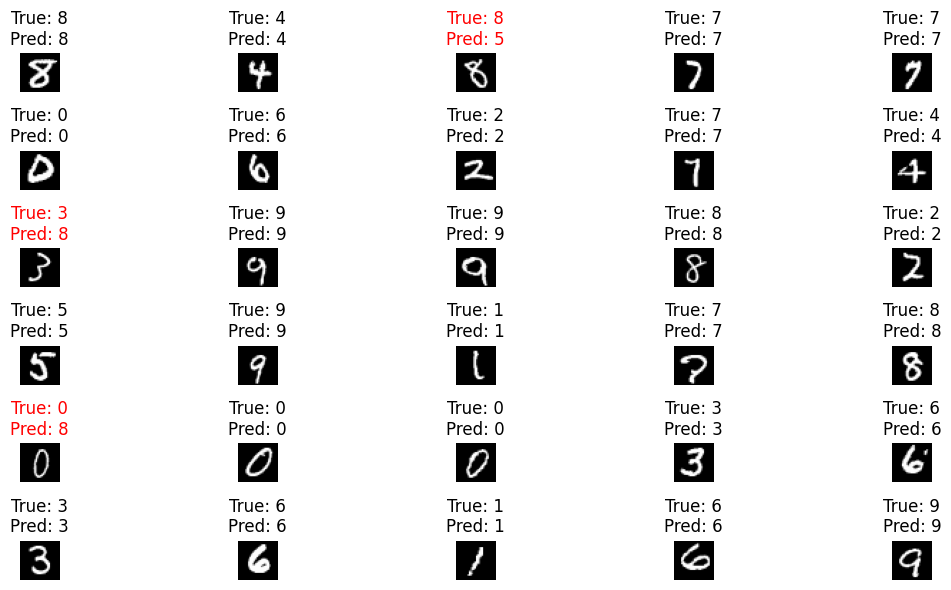

In [40]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

## **80:20**

In [41]:
# 4. Pembagian Data Training dan Testing 70:30
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2, random_state=42)

In [42]:
# 5. Klasifikasi dengan Naive Bayes Multinomial
nb_classifier = MultinomialNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [43]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [44]:
evaluate_model(y_test, nb_test_preds, "Naive Bayes Multi (Testing)")
print("")
print("")
evaluate_model(y_train, nb_train_preds, "Naive Bayes Multi (Training)")

Naive Bayes Multi (Testing) Accuracy: 0.829 = 82.90%
Naive Bayes Multi (Testing) Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1343
           1       0.88      0.94      0.90      1600
           2       0.88      0.83      0.85      1380
           3       0.80      0.82      0.81      1433
           4       0.84      0.74      0.78      1295
           5       0.86      0.67      0.75      1273
           6       0.88      0.91      0.90      1396
           7       0.94      0.83      0.88      1503
           8       0.67      0.78      0.72      1357
           9       0.70      0.84      0.76      1420

    accuracy                           0.83     14000
   macro avg       0.84      0.83      0.83     14000
weighted avg       0.84      0.83      0.83     14000

Naive Bayes Multi (Testing) Confusion Matrix:
[[1215    1    8    4    2   21   29    1   60    2]
 [   0 1498    6   13    1   10    5  

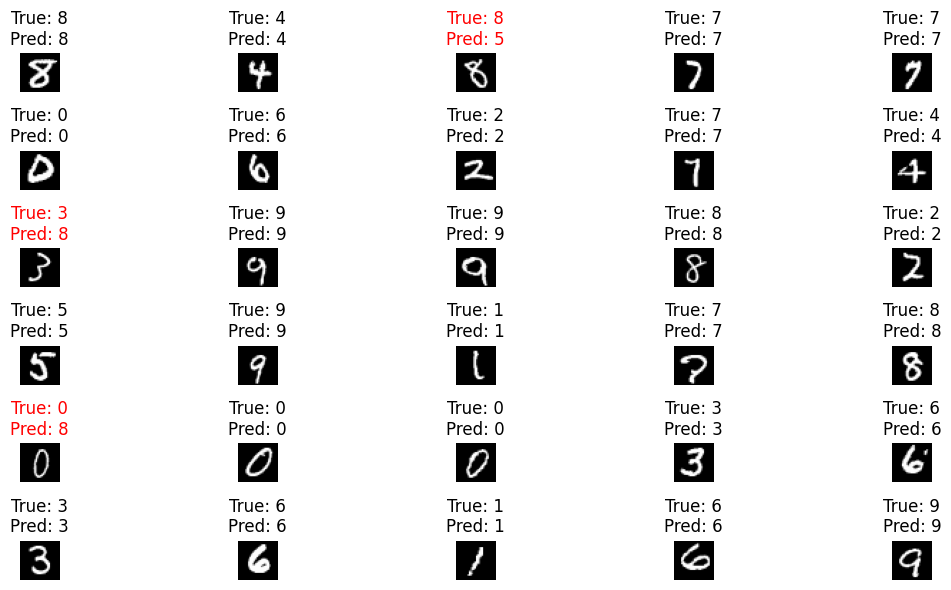

In [45]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

## **90:10**

In [46]:
# 4. Pembagian Data Training dan Testing 70:30
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.1, random_state=42)

In [47]:
# 5. Klasifikasi dengan Naive Bayes Multinomial
nb_classifier = MultinomialNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [48]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [49]:
evaluate_model(y_test, nb_test_preds, "Naive Bayes Multi (Testing)")
print("")
print("")
evaluate_model(y_train, nb_train_preds, "Naive Bayes Multi (Training)")

Naive Bayes Multi (Testing) Accuracy: 0.8294285714285714 = 82.94%
Naive Bayes Multi (Testing) Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       683
           1       0.86      0.94      0.90       800
           2       0.87      0.82      0.85       674
           3       0.79      0.82      0.81       760
           4       0.83      0.74      0.79       611
           5       0.88      0.69      0.77       658
           6       0.86      0.91      0.89       677
           7       0.95      0.82      0.88       724
           8       0.67      0.76      0.71       693
           9       0.72      0.85      0.78       720

    accuracy                           0.83      7000
   macro avg       0.84      0.83      0.83      7000
weighted avg       0.84      0.83      0.83      7000

Naive Bayes Multi (Testing) Confusion Matrix:
[[622   0   4   2   0  11  14   0  29   1]
 [  0 751   3   7   0   3   5   0  

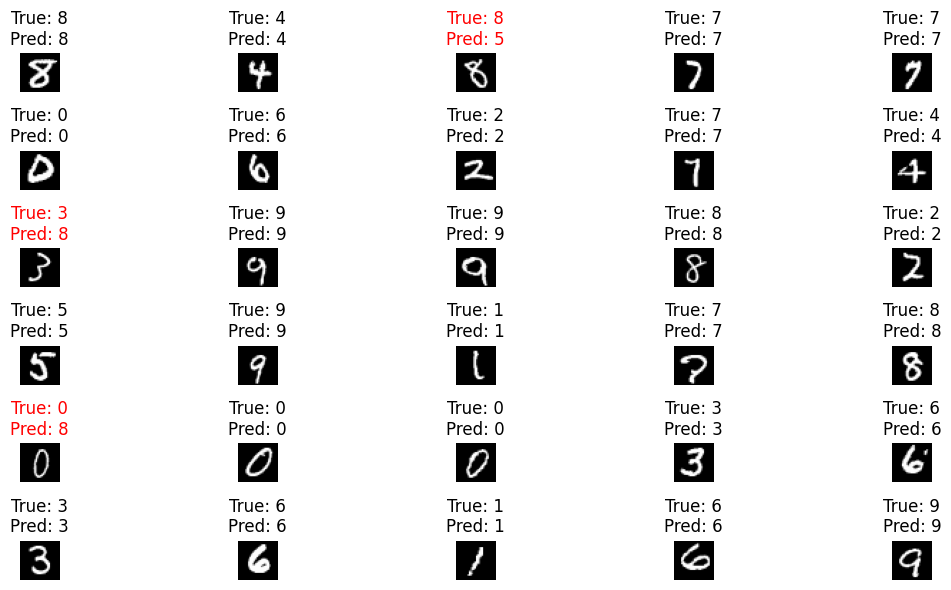

In [50]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()